In [613]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score, classification_report

In [614]:
RANDOM_SEED = 23520043

# Import Data

In [615]:
df_raw = pd.read_csv('dataset/diabetes.csv')
df = df_raw.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [617]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [618]:
# checking null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis

## Check The Distribution

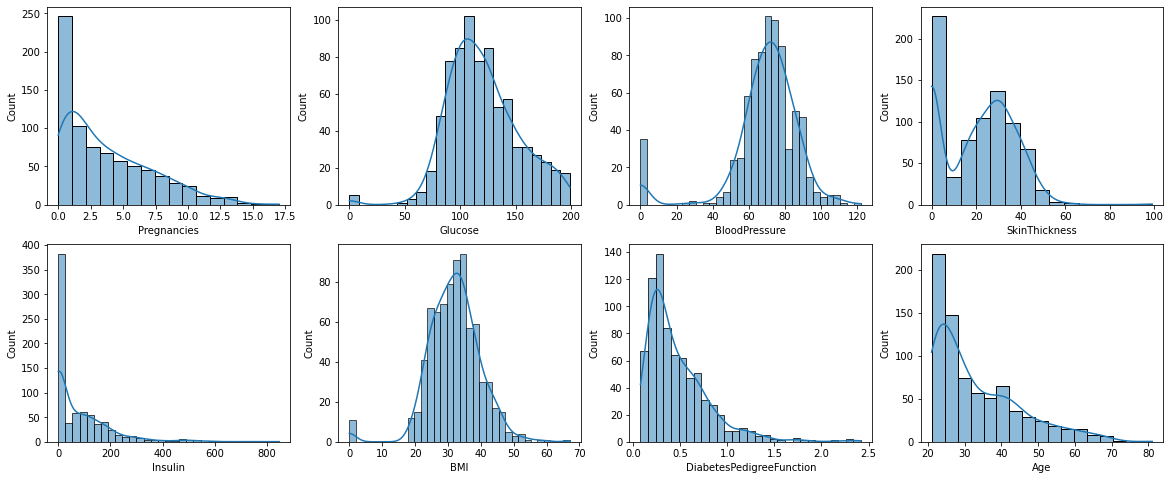

In [619]:
fig, ax =plt.subplots(2,4, figsize=(20,8))

for i, column in enumerate(df.drop(columns='Outcome').columns):
    sns.histplot(df, x=column, ax=ax[i//4,i%4], kde=True)
    
plt.show()
    

## Data Imputation

In [620]:
# Column 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' have a lot of 0
# These column should not have 0 value
# Therefore we impute it with their median

for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[column] = df[column].replace(0, int(df[column].median()))

## Data Visualization

### Pregnancies
It appears from the right countplot that as the number of pregnancies increase, the probability of diabetes increases too 

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


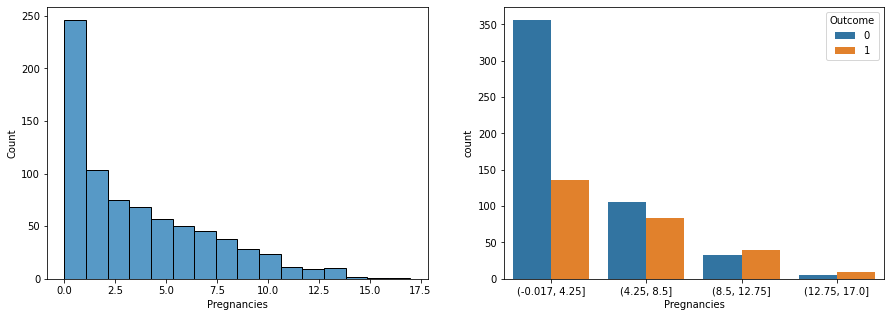

In [621]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='Pregnancies', ax=ax[0])
sns.countplot(pd.cut(df["Pregnancies"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### Glucose
It appears from the right countplot that as the glucose score increases, the probability of diabetes increases too 

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


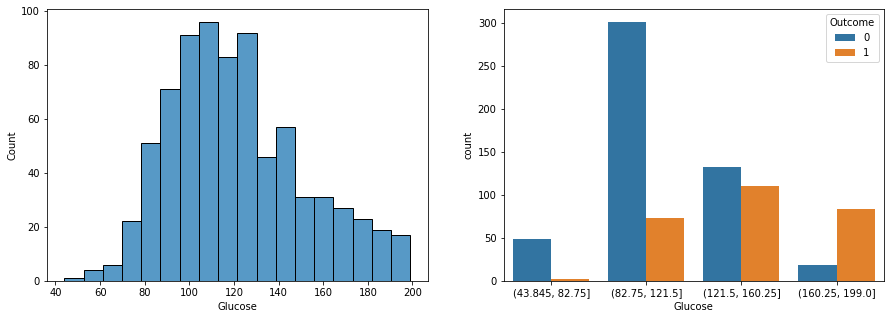

In [622]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='Glucose', ax=ax[0])
sns.countplot(pd.cut(df["Glucose"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### Blood Pressure
It appears from the right countplot that as the blood pressure increases, the probability of diabetes increases too 

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


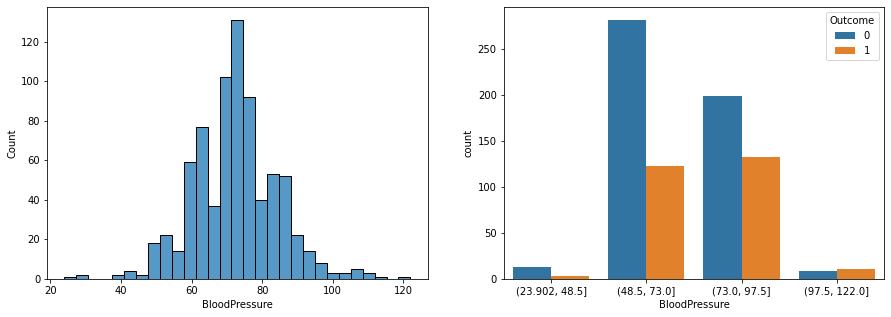

In [623]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='BloodPressure', ax=ax[0])
sns.countplot(pd.cut(df["BloodPressure"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### Skin Thickness
It appears from the right countplot that as the skin thickness increases, the probability of diabetes increases too

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


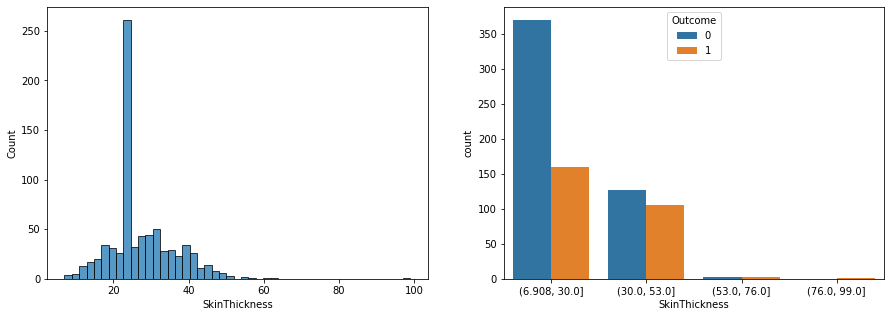

In [624]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='SkinThickness', ax=ax[0])
sns.countplot(pd.cut(df["SkinThickness"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### Insulin
It appears from the right countplot, people with insulin score between 430-638 have higher chance of diabetes 

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


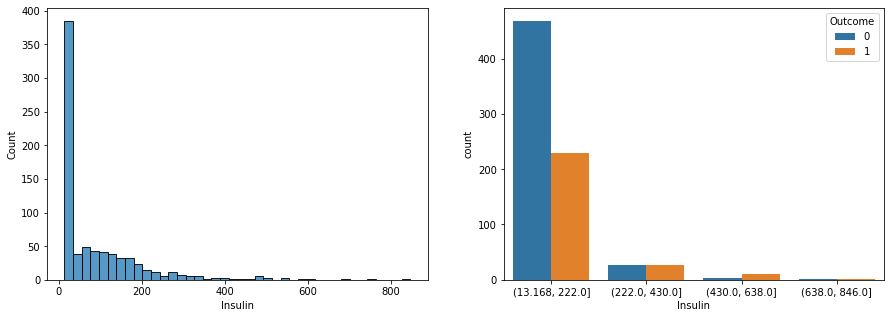

In [625]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='Insulin', ax=ax[0])
sns.countplot(pd.cut(df["Insulin"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### BMI
It appears from the right countplot, people with BMI score between 42.65-54.875 have higher chance of diabetes 

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


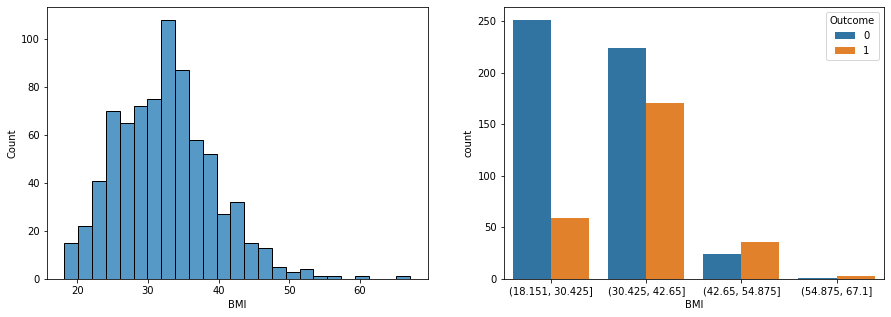

In [626]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='BMI', ax=ax[0])
sns.countplot(pd.cut(df["BMI"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### Diabetes Pedigree Function
It appears from the right countplot, as the diabetes pedigree function score increases, the chance of diabetes increases too

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


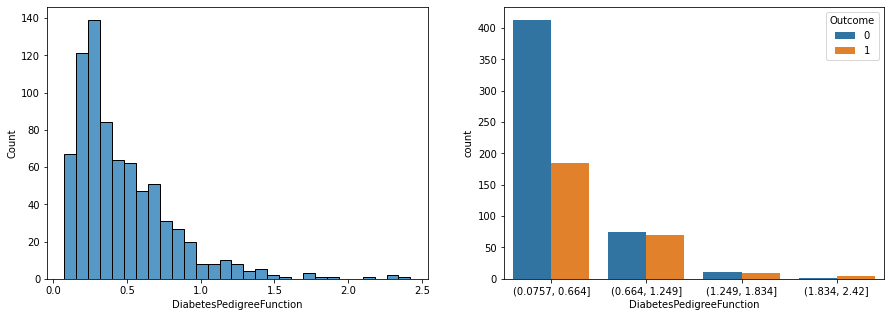

In [627]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='DiabetesPedigreeFunction', ax=ax[0])
sns.countplot(pd.cut(df["DiabetesPedigreeFunction"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

### Age
It appears from the right countplot, people with age between 36-66 have higher chance of diabetes 

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


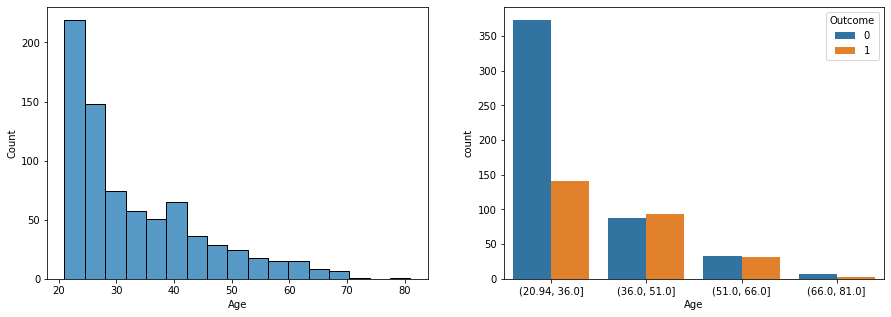

In [628]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.histplot(df, x='Age', ax=ax[0])
sns.countplot(pd.cut(df["Age"], bins=4), hue=df['Outcome'], ax=ax[1])
plt.show()

## Feature Correlation
As we can see, there are no high correlation between features, therefore we don't need to drop any column

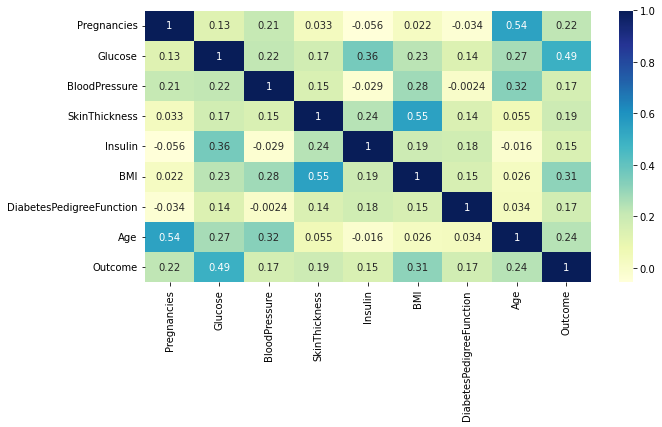

In [629]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)

plt.show()

## Label Proportion
Our data suffers from data imbalance, we need to use proper metric to evaluate our model, like precision, recall & f1

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


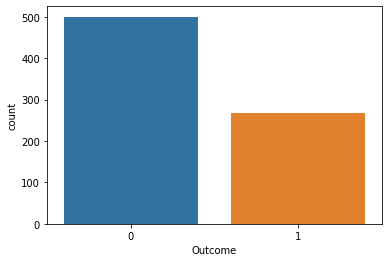

In [630]:
sns.countplot(df['Outcome'])
plt.show()

# Modelling

## Data Preprocessing

### Handle Skewed Data
Some of the date are skewed, we need to normalize it so the model works better. Some models (especially linear-based-model, like logistic regression assumes the data is normally distributed)

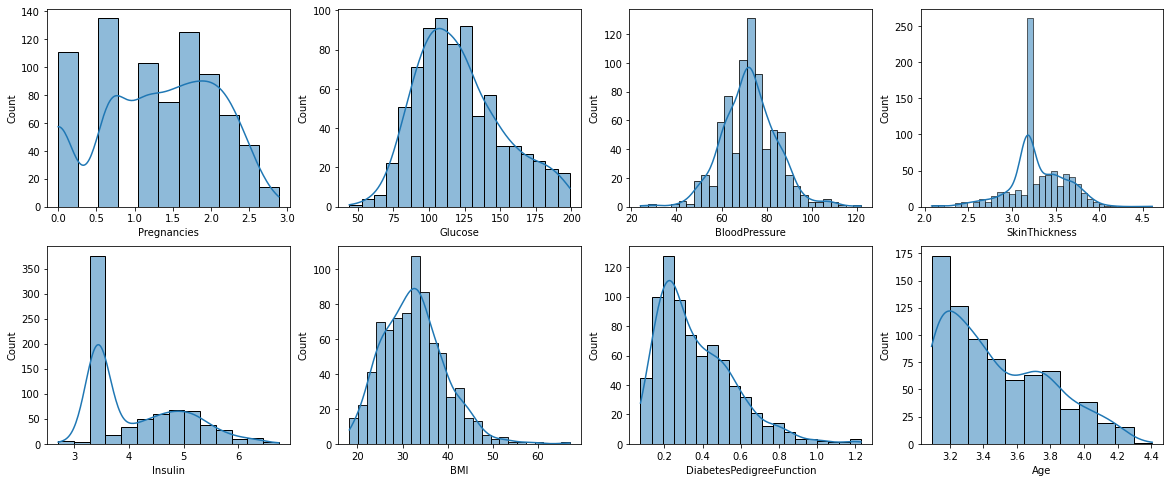

In [631]:
SKEWED_COLUMNS = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
df[SKEWED_COLUMNS] = np.log(df[SKEWED_COLUMNS]+1)

df_unskewed = df.copy()

fig, ax = plt.subplots(2,4, figsize=(20,8))

for i, column in enumerate(df.drop(columns='Outcome').columns):
    sns.histplot(df, x=column, ax=ax[i//4,i%4], kde=True)
    
plt.show()

### Standardize the Data 
Our data spreads with different range, we need to standardize it

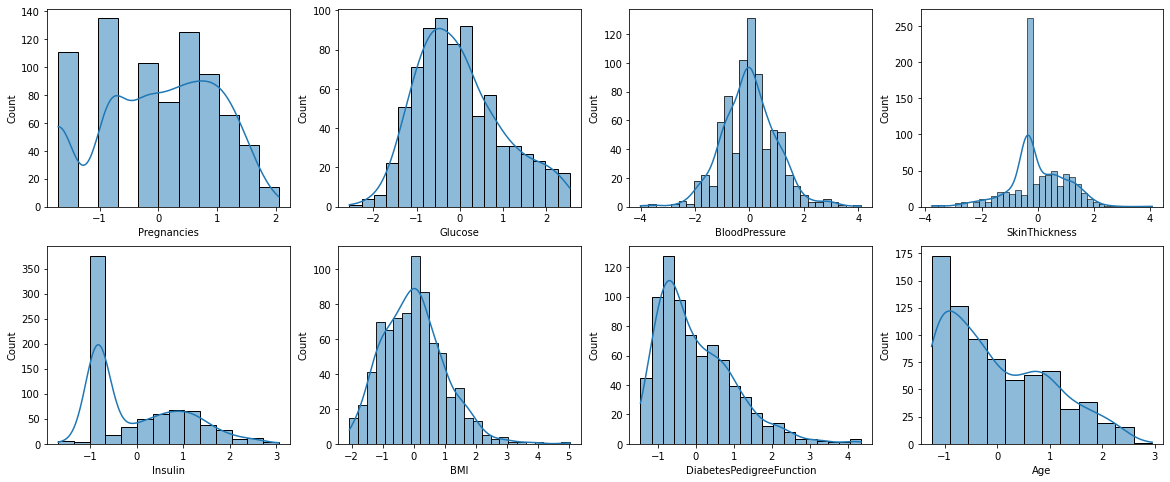

In [632]:
# Standardize the data into the same scale
SCALE_COLUMNS = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
scaler.fit(df[SCALE_COLUMNS])
df[SCALE_COLUMNS] = scaler.transform(df[SCALE_COLUMNS])

fig, ax =plt.subplots(2,4, figsize=(20,8))

for i, column in enumerate(df.drop(columns='Outcome').columns):
    sns.histplot(df, x=column, ax=ax[i//4,i%4], kde=True)
    
plt.show()

## Train Test Split

In [633]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

## Training

In [634]:
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier(n_estimators=200)
model_3 = LogisticRegression()

models = [model_1, 
          model_2, 
          model_3]

In [635]:
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

In [636]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       100
           1       0.58      0.54      0.56        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154

LogisticRegression()
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.

From our experiment with 3 models we get that our random forest classifier achieve highest f1-score. This metric works well with imbalanced data like out case. Therefore we choose this model to be used in out production

In [674]:
import pickle

pickle.dump(model_2, open('saved_models/random_forest.sav', 'wb'))
pickle.dump(scaler, open('saved_models/standard_scaler.sav', 'wb'))

# Prod Test

In [666]:
def preprocess(df, scaler):
    # impute data with 0 value with median from training set
    df['Glucose'] = df['Glucose'].replace(0, 117.0)
    df['BloodPressure'] = df['BloodPressure'].replace(0, 72.0)
    df['SkinThickness'] = df['SkinThickness'].replace(0, 23.0)
    df['Insulin'] = df['Insulin'].replace(0, 30.5)
    df['BMI'] = df['BMI'].replace(0, 32.0)
    
    df[SKEWED_COLUMNS] = np.log(df[SKEWED_COLUMNS]+1)
    df = scaler.transform(df)
    
    return df

In [671]:
feature_list = {'Pregnancies': '1', 
                'Glucose': '85', 
                'BloodPressure': '66', 
                'SkinThickness': '29', 
                'Insulin': '0', 
                'BMI': '26.6', 
                'DiabetesPedigreeFunction': '0.351', 
                'Age': '31'}

df_feature_list = pd.DataFrame(data=np.array(list(feature_list.values())).reshape(1,-1), columns=feature_list.keys())
df_feature_list = df_feature_list.astype(float)


df_feature_list = preprocess(df_raw.loc[:,:'Age'].head(10), scaler)

loaded_model.predict(df_feature_list)

c:\users\dandy\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)